In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use(['science', 'notebook', 'grid'])

The returns for the European, Australian and Japanese assets must be adjusted for the currency returns in EUR, AUD, JPY.

In [3]:
# European assets
# 1.  MSE
# 2. IEAC
eur_ret = pd.read_csv('../database/return_samples/EUR.txt')
mse_ret = pd.read_csv('../database/return_samples/MSE.txt')
ieac_ret = pd.read_csv('../database/return_samples/IEAC.txt')

mse_ret = np.exp(mse_ret + eur_ret) - 1
ieac_ret = np.exp(ieac_ret + eur_ret) - 1

In [4]:
# Australian assets
# 1. VAX
aud_ret = pd.read_csv('../database/return_samples/AUD.txt')
vax_ret = pd.read_csv('../database/return_samples/VAS.txt')

vax_ret = np.exp(vax_ret + aud_ret) - 1

In [5]:
# Japanese assets
# 1. 1321.T
jpy_ret = pd.read_csv('../database/return_samples/JPY.txt')
_1321_ret = pd.read_csv('../database/return_samples/1321.txt')

_1321_ret = np.exp(_1321_ret + jpy_ret) - 1

In [6]:
# American assets
# 1. IVV
# 2. LQD
# 3. HYG
# 4. GLD

ivv_ret = np.exp(pd.read_csv('../database/return_samples/IVV.txt')) - 1
lqd_ret = np.exp(pd.read_csv('../database/return_samples/LQD.txt')) - 1
hyg_ret = np.exp(pd.read_csv('../database/return_samples/HYG.txt')) - 1
gld_ret = np.exp(pd.read_csv('../database/return_samples/GLD.txt')) - 1

The portfolio is equally weighted: $\omega_i = \frac{1}{n}$, with the adjusted portfolio returns we obtain the portfolio return by a simple inner product.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


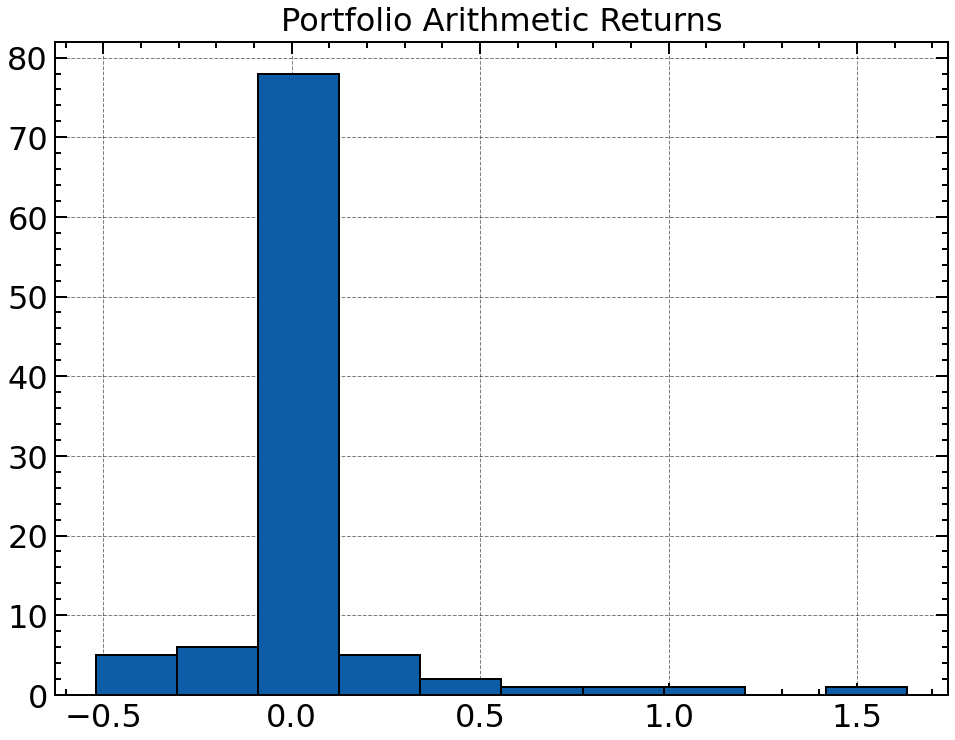

In [7]:
eq_weight  = 1/8
port_ret = 1/8 * (ivv_ret + lqd_ret + hyg_ret + gld_ret + mse_ret + ieac_ret + vax_ret + _1321_ret)

plt.hist(port_ret, edgecolor='black')
plt.title('Portfolio Arithmetic Returns')
plt.savefig('portret.eps')
plt.show()

Using the RiskUtils we can obtain a risk assessment of this portfolio.

In [8]:
from risk_utils.risk_utils import RiskAssessor
ra = RiskAssessor(np.array(port_ret))

In [9]:
ra.risk_summary()

======== RISK ASSESSMENT ========
VaR95 0.29782313696598856,    ES95 0.35756726946156114
VaR99 0.3229027628681832,     ES99 0.5201658395570046
EVT VaR99 0.3787900573220511, EVT ES99 0.5231983506858939


/Users/axelnilsson/Desktop/Abacus/risk_utils/risk_utils.py:133: RuntimeWarning: invalid value encountered in log
  return n_observations * np.log(params[1]) + (1 + 1 / params[0]) * log_likelihood
/Users/axelnilsson/Desktop/Abacus/risk_utils/risk_utils.py:131: RuntimeWarning: invalid value encountered in log
  log_likelihood = log_likelihood + np.log(1 + params[0] / params[1] * obs)


In [10]:
print(ra._evt_params)

[0.49472487 0.03290957]
